## Syfte
Syftet med projektet är att bygga en komplett ETL-pipeline som:
- Läser in rådata
- Rensar och transformerar data
- Lagrar data i en databas
- Möjliggör analys av verksamheten


NameError: name 'sqlite3' is not defined

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# KONFIGURATION

In [1347]:
raw_data_path = "resenorden_data.csv"
validation_data_path = "resenorden_validation.csv"
db_path = "resenorden.db"
table_name = "orders_cleaned"

# Extract
- Läs in rådata från CSV-filen
- Gör initial utforskning (EDA)

In [1346]:
df=pd.read_csv('resenorden_data.csv')  
#df.head() 

In [1268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bokning_id       1915 non-null   object 
 1   bokningsdatum    1915 non-null   object 
 2   kund_id          1915 non-null   object 
 3   destination      1915 non-null   object 
 4   land             1786 non-null   object 
 5   avresedatum      1915 non-null   object 
 6   hemresedatum     1915 non-null   object 
 7   antal_resenärer  1915 non-null   int64  
 8   pakettyp         1915 non-null   object 
 9   pris             1915 non-null   float64
 10  valuta           1878 non-null   object 
 11  hotell           1840 non-null   object 
 12  bokningskanal    1802 non-null   object 
 13  status           1915 non-null   object 
 14  avbokningsdatum  155 non-null    object 
 15  recension_text   681 non-null    object 
 16  recensionsdatum  681 non-null    object 
 17  betyg         

In [1269]:
df['bokningsdatum'].value_counts()

bokningsdatum
2024-12-14           13
2024-01-19           13
2024-03-23           12
2024-09-14           12
2024-11-05           11
                     ..
2024/11/08            1
November 25, 2024     1
2024/12/16            1
12-12-2024            1
19-12-2024            1
Name: count, Length: 396, dtype: int64

In [1270]:
df['hemresedatum'].value_counts()

hemresedatum
2024-04-14           15
2024-08-01           12
2024-05-29           12
2024-12-06           11
2024-04-22           11
                     ..
May 12, 2024          1
11 april 2024         1
15 januari 2025       1
December 21, 2024     1
2024-01-15            1
Name: count, Length: 450, dtype: int64

In [1271]:
df['avresedatum'].value_counts()

avresedatum
2024-10-14          11
2024-11-03          10
2024-10-20          10
2024-03-16          10
2024-09-15          10
                    ..
14 december 2024     1
2025-02-13           1
2024/12/29           1
26 januari 2025      1
19 januari 2025      1
Name: count, Length: 449, dtype: int64

In [1272]:
df['destination'].value_counts()

destination
Köpenhamn      592
Oslo           232
Tromsø         163
Reykjavik      163
Helsingfors    136
Rovaniemi      128
Bergen          95
Trondheim       75
Kopenhamn       29
København       24
KÖPENHAMN       24
köpenhamn       23
CPH             18
oslo            16
Copenhagen      16
Rovaniem        14
TRONDHEIM       12
helsingfors     12
bergen          10
Helsinki        10
Tromsö           9
Oslö             9
tromsø           9
REYKJAVIK        9
Tromso           8
reykjavik        8
TROMSØ           8
ROVANIEMI        8
OSLO             8
Reykavik         7
rovaniemi        6
trondheim        6
Hfors            6
tromso           6
HELSINGFORS      5
Tronheim         3
Reykjavík        3
BERGEN           3
Rey              2
Name: count, dtype: int64

In [1273]:
df['status'].value_counts()

status
Genomförd    1456
Avbokad       147
Bekräftad     128
Klar           46
GENOMFÖRD      39
Completed      36
genomförd      27
Confirmed       7
OK              6
bekräftad       5
Bokad           4
avbokad         3
Cancelled       3
AVBOKAD         3
BEKRÄFTAD       3
Struken         2
Name: count, dtype: int64

In [1274]:
df['pakettyp'].value_counts()

pakettyp
Weekend-paket    544
Halvpension      425
All inclusive    367
Endast boende    343
WEEKEND-PAKET     21
Helgresa          20
halvpension       16
weekend-paket     16
HP                16
Room Only         15
Half Board        15
Weekend paket     14
bara hotell       13
RO                12
Endast Boende     11
ALL INCLUSIVE     10
AI                 9
All-inclusive      9
Weekend            9
HALVPENSION        9
All Inkl           8
endast boende      7
all inclusive      6
Name: count, dtype: int64

In [1275]:
df['bokningskanal'].value_counts()

bokningskanal
Webb        864
App         531
Telefon     287
WEBB         17
web          16
Website      12
Online       12
app          11
Mobile       10
APP           9
Internet      7
Ring          7
Tel           6
telefon       4
Mobil         4
TELEFON       3
Phone         2
Name: count, dtype: int64

In [1276]:
df['land'].isnull().sum()


np.int64(129)

## Identifierade datakvalitetsproblem

- bokningsdatum,avresedatum,hemresedatum- har Olika datumseparatorer,Olika datumordningar

- destination- har olika stavningar och namn, att en stad har olika namnformer samt små och stora bokstäver.vissa har förkortningar och felstavningar. 

- status- har språkblanding, synonymer att olika ord som beryder samma, olika staving på samma av samma sak  

- pakettyp- innehåller många olika ord för samma typ av paket eller boende. 

- bokningskanal- olika namn för samma kanaltyp 

- land- Några länder hade NaN-värden i datafältet, men en destination var angiven i ett annat fält.

# Transform
- Datatvätt
- Data Dictionary
- Feature Engineering
- Sentimentanalys

In [1277]:
df['bokningsdatum'].value_counts()  

bokningsdatum
2024-12-14           13
2024-01-19           13
2024-03-23           12
2024-09-14           12
2024-11-05           11
                     ..
2024/11/08            1
November 25, 2024     1
2024/12/16            1
12-12-2024            1
19-12-2024            1
Name: count, Length: 396, dtype: int64

In [1278]:
df['bokningsdatum']= df['bokningsdatum'].str.lower().str.strip().astype(str)

In [1279]:
months_map = {
    "januari": "1",
    "februari": "2",
    "mars": "3",
    "april": "4",
    "maj": "5",
    "juni": "6",
    "juli": "7",
    "augusti": "8",
    "september": "9",
    "oktober": "10",
    "november": "11",
    "december": "12",
}

df["bokningsdatum"] = (df["bokningsdatum"].replace(months_map, regex=True))

df["bokningsdatum_clean"] = pd.to_datetime(
    df["bokningsdatum"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)


In [1280]:
df['bokningsdatum_clean'].value_counts()

bokningsdatum_clean
2024-12-14    13
2024-01-19    13
2024-02-05    12
2024-03-23    12
2024-09-14    12
              ..
2024-05-31     1
2024-03-08     1
2024-10-20     1
2024-03-17     1
2024-01-05     1
Name: count, Length: 335, dtype: int64

Dictionary 
bokningsdatum = datum bokningen skapades / datatyp=object / rå data

bokningsdatum_clean = rensad bokningsdatum / datatyp=datetime64[ns] / jag skapade en kopia av bokningsdatum och konverterade datetime-format med pd.to_datetime(df[''],errors='coerce'), så att vi använder samma datumformat i hela datasetet. 

In [1281]:
df['destination'].head(5)

0    Köpenhamn
1    Rovaniemi
2    Rovaniemi
3       Tromsø
4    Köpenhamn
Name: destination, dtype: object

In [1282]:
df['destination_clean']=df['destination'].str.lower().str.strip()

In [1283]:
destination_map={
    'kopenhamn':'köpenhamn',    
    'oslö':'oslo',
    'rey':'reykjavik',      
    'reykjavík':'reykjavik',
    'reykavik':'reykjavik',
    'tromsö':'tromsø',
    'tromso':'tromsø',
    'hfors':'helsingfors',
    'rovaniem':'rovaniemi',
    'tronheim':'trondheim',
    'københavn':'köpenhamn',
    'cph':'köpenhamn',
    'copenhagen':'köpenhamn',
    }

df['destination_clean']=df['destination_clean'].replace(destination_map)

In [1284]:
df['destination_clean'].value_counts()

destination_clean
köpenhamn      726
oslo           265
tromsø         203
reykjavik      192
helsingfors    159
rovaniemi      156
bergen         108
trondheim       96
helsinki        10
Name: count, dtype: int64

Dictionary 

destination = dem olika desrinationel mna kan åka till / datatyp-object / rå data   

destination_clean = gjorde om allt till små bokstäver med .str.lower() och tog bort mellanslagen med .str.strip(). Skapade en kopia av destination. Sedan gjorde jag mapping för att slå ihop dubbletter samt standardiserade stavningen. / datatyp-object / rensad och standardiserad version 

In [1285]:
df['land'].isnull().sum()


np.int64(129)

In [1286]:
destination_to_land = {
    'köpenhamn':'danmark',
    'oslo':'norge',
    'reykjavik':'island',
    'tromsø':'norge',
    'helsingfors':'finland',    
    'rovaniemi':'finland',
    'trondheim':'norge', 
    'helsinki':'finland',
    'bergen':'norge',   
} 
df['land_clean']= df['land']
df['land_clean']= df['land_clean'].fillna(
    df['destination_clean'].map(destination_to_land).str.capitalize().str.strip()
)

In [1287]:
df['land'].isnull().sum()
df[['destination_clean', 'land', 'land_clean']].head(10)    

,destination_clean,land,land_clean
0,köpenhamn,Danmark,Danmark
1,rovaniemi,Finland,Finland
2,rovaniemi,Finland,Finland
3,tromsø,Norge,Norge
4,köpenhamn,Danmark,Danmark
5,oslo,Norge,Norge
6,köpenhamn,Danmark,Danmark
7,helsingfors,Finland,Finland
8,köpenhamn,Danmark,Danmark
9,reykjavik,Island,Island


dictonary 
land = land som är kopplat till destination / datatyp-objek / rå data / innehåller saknade värden-NAN

land_clean = rensade version av land /datatyp-objek/ ren data / saknade värden (NaN) fylldes i genom mapping mella destination_clean och land efter att destination standadeserades. 

In [1288]:
df['avresedatum'].value_counts()

avresedatum
2024-10-14          11
2024-11-03          10
2024-10-20          10
2024-03-16          10
2024-09-15          10
                    ..
14 december 2024     1
2025-02-13           1
2024/12/29           1
26 januari 2025      1
19 januari 2025      1
Name: count, Length: 449, dtype: int64

In [1289]:
df['avresedatum']= df['avresedatum'].str.lower().str.strip().astype(str)

In [1290]:
months_map = {
    "januari": "1",
    "februari": "2",
    "mars": "3",
    "april": "4",
    "maj": "5",
    "juni": "6",
    "juli": "7",
    "augusti": "8",
    "september": "9",
    "oktober": "10",
    "november": "11",
    "december": "12",
}

df["avresedatum"] = (df["avresedatum"].replace(months_map, regex=True))

df["avresedatum_clean"] = pd.to_datetime(
    df["avresedatum"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

In [1291]:
df['avresedatum_clean'].value_counts()

avresedatum_clean
2024-10-14    11
2024-12-19    10
2024-11-03    10
2024-10-20    10
2024-03-16    10
              ..
2024-02-05     1
2024-01-31     1
2024-12-01     1
2025-01-21     1
2025-01-31     1
Name: count, Length: 391, dtype: int64

Dictionary 
avresedatum = avfärds datumet / datatyp=object / rå data

avresedatum_clean = rensad avresedatum / datatyp=datetime64[ns] / jag skapade en kopia av avresedatum och konverterade datetime-format med pd.to_datetime(df[''],errors='coerce'), så att vi använder samma datumformat i hela datasetet.

In [1292]:
df['hemresedatum'].value_counts()

hemresedatum
2024-04-14           15
2024-08-01           12
2024-05-29           12
2024-12-06           11
2024-04-22           11
                     ..
May 12, 2024          1
11 april 2024         1
15 januari 2025       1
December 21, 2024     1
2024-01-15            1
Name: count, Length: 450, dtype: int64

In [1293]:
df['hemresedatum']= df['hemresedatum'].str.lower().str.strip().astype(str)

In [1294]:
months_map = {
    "januari": "1",
    "februari": "2",
    "mars": "3",
    "april": "4",
    "maj": "5",
    "juni": "6",
    "juli": "7",
    "augusti": "8",
    "september": "9",
    "oktober": "10",
    "november": "11",
    "december": "12",
}

df["hemresedatum"] = (df["hemresedatum"].replace(months_map, regex=True))

df["hemresedatum_clean"] = pd.to_datetime(
    df["hemresedatum"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

In [1295]:
df['hemresedatum_clean'].value_counts()

hemresedatum_clean
2024-04-14    15
2024-12-06    13
2024-08-01    12
2024-05-29    12
2024-04-22    11
              ..
2024-01-26     1
2024-12-05     1
2024-12-29     1
2025-01-04     1
2025-02-05     1
Name: count, Length: 390, dtype: int64

Dictionary 
hemresedatum = ankomst datumet / datatyp=object / rå data

hemresedatum_clean = rensad hemresedatum / datatyp=datetime64[ns] / jag skapade en kopia av hemresedatum och konverterade datetime-format med pd.to_datetime(df[''],errors='coerce'), så att vi använder samma datumformat i hela datasetet.

In [1296]:
df['pakettyp'].head(10)

0    Weekend-paket
1    All inclusive
2      Halvpension
3      Halvpension
4    Weekend-paket
5    ALL INCLUSIVE
6    Endast boende
7      Halvpension
8    Weekend-paket
9    Weekend-paket
Name: pakettyp, dtype: object

In [1297]:
df['pakettyp_clean']=df['pakettyp'].str.lower().str.strip()

In [1298]:
pakettyp_map={
    'Weekend-paket':'weekend-paket',
    'WEEKEND-PAKET':'weekend-paket',
    'Weekend paket':'weekend-paket',
    'Weekend':'weekend-paket',
    'Helgresa':'weekend-paket',
    'Halvpension':'halvpension',
    'HP':'halvpension',
    'HALVPENSION':'halvpension',
    'All inclusive':'all-inclusive',
    'ALL INCLUSIVE':'all-inclusive',
    'AI':'all-inclusive',
    'All-inclusive':'all-inclusive',
    'All Inkl':'all-inclusive',
    'all inclusive':'all-inclusive',
    'Endast boende':'endast-boende',
    'Room Only':'endast-boende',
    'RO':'endast-boende',
    'Endast Boende':'endast-boende',
    'endast boende':'endast-boende',
    'bara hotell':'endast-boende',
    
    'helgresa': 'weekend-paket',
    'weekend paket': 'weekend-paket',
    'weekend': 'weekend-paket',

    'hp': 'halvpension',
    'half board': 'halvpension',

    'room only': 'endast-boende',
    'ro': 'endast-boende',

    'ai': 'all-inclusive',
    'all inkl': 'all-inclusive'
}
df['pakettyp_clean']=df['pakettyp_clean'].replace(pakettyp_map)

In [1299]:
df['pakettyp_clean'].value_counts()


pakettyp_clean
weekend-paket    624
halvpension      481
all-inclusive    409
endast-boende    401
Name: count, dtype: int64

Dictionary 

pakettyp = dem olika pakettyper man kan välja mellan/ datatyp-objekt / rå data   

pakettype_clean = gjorde om allt till små bokstäver med .str.lower() och tog bort mellanslagen med .str.strip(). Skapade en kopia av pakettyp. Sedan gjorde jag mapping för att slå ihop dubbletter samt standardiserade stavningen. / datatyp-object / rensad och standardiserad version 

In [1300]:
df['hotell'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1915 entries, 0 to 1914
Series name: hotell
Non-Null Count  Dtype 
--------------  ----- 
1840 non-null   object
dtypes: object(1)
memory usage: 15.1+ KB


In [1301]:
df['hotell'] = df['hotell'].fillna('okänt')


Dictionary
hotell
beskrivning: Namnet på hotellet som bokningen gäller,
gjorde om alla null-värde: okänt,
notering: Null betyder att hotellet inte är registrerat eller ingår inte i paketet

In [1302]:
df['bokningskanal'].value_counts()

bokningskanal
Webb        864
App         531
Telefon     287
WEBB         17
web          16
Website      12
Online       12
app          11
Mobile       10
APP           9
Internet      7
Ring          7
Tel           6
telefon       4
Mobil         4
TELEFON       3
Phone         2
Name: count, dtype: int64

In [1303]:
df['bokningskanal_clean']=df['bokningskanal'].str.lower().str.strip()

In [1304]:
bokningskanal_map={
    'webb':'website',
    'app':'app',
    'website':'website',
    'webb':'website',
    'telefon':'telefon',
    'phone':'telefon',
    'telefon':'telefon',
    'web':'website',
    'online':'website',
    'mobile':'telefon',
    'ring':'telefon',
    'internet':'website',
    'tel':'telefon',
    'mobil':'telefon', 
}
df['bokningskanal_clean']=df['bokningskanal_clean'].replace(bokningskanal_map)

In [1305]:
df['bokningskanal_clean'] = df['bokningskanal_clean'].fillna('okänt')


In [1306]:
df['bokningskanal_clean'].value_counts()

bokningskanal_clean
website    928
app        551
telefon    323
okänt      113
Name: count, dtype: int64

Dictionary 

bokningskanal = dem olika boknings metoder/ datatyp-objekt / rå data   

bokningskanal_clean = gjorde om allt till små bokstäver med .str.lower() och tog bort mellanslagen med .str.strip(). Skapade en kopia av bokningskanal. Sedan gjorde jag mapping för att slå ihop dubbletter samt standardiserade stavningen. / datatyp-object / rensad och standardiserad version 

gjorde om alla null-värde till okänt,

In [1307]:
df['status'].value_counts()

status
Genomförd    1456
Avbokad       147
Bekräftad     128
Klar           46
GENOMFÖRD      39
Completed      36
genomförd      27
Confirmed       7
OK              6
bekräftad       5
Bokad           4
avbokad         3
Cancelled       3
AVBOKAD         3
BEKRÄFTAD       3
Struken         2
Name: count, dtype: int64

In [1308]:
df['status_clean']=df['status'].str.lower().str.strip()

In [1309]:
status_map={
    'genomförd':'bekräftad', 
    'bekräftad' : 'bekräftad',
    'klar' : 'bekräftad',
    'completed' : 'bekräftad',
    'confirmed' : 'bekräftad',
    'ok' : 'bekräftad',
    'bokad' : 'bekräftad',
    'bekräftad' : 'bekräftad',
    'struken' : 'avbokad',
    'avbokad' : 'avbokad',
    'cancelled' : 'avbokad',
    'avbokad' : 'avbokad',
    'struken' : 'avbokad',
}
df['status_clean']=df['status_clean'].replace(status_map)


In [1310]:
df['status_clean'].value_counts()

status_clean
bekräftad    1757
avbokad       158
Name: count, dtype: int64

Dictionary 

status = status på bokningen/ datatyp-objekt / rå data   

status_clean = gjorde om allt till små bokstäver med .str.lower() och tog bort mellanslagen med .str.strip(). Skapade en kopia av status. Sedan gjorde jag mapping för att slå ihop dubbletter samt standardiserade stavningen. / datatyp-object / rensad och standardiserad version 

## Valutakonvertering
För att möjliggöra analys konverteras alla priser till SEK.

In [1311]:
df['valuta_clean']=df['valuta'].str.lower().str.strip() #move upp

In [1312]:
#currency → SEK mapping
valuta_map = {
    'sek': 1.0,
    'eur': 11.3,
    'nok': 0.95,
    'dkk': 1.52
}

# convert directly to SEK
df['pris_sek'] = df['pris'] * df['valuta_clean'].map(valuta_map)

# (optional) drop helper column
df = df.drop(columns=['valuta_clean'])

In [1313]:
df['valuta'] = df['valuta'].fillna('okänt')

In [1314]:
def clean_pris_sek(df):
    df_clean = df.copy()

    valuta_map = {
        'sek': 1.0,
        'eur': 11.3,
        'nok': 0.95,
        'dkk': 1.52
    }

    # normalize valuta text first (important)
    df_clean['valuta_clean'] = (
        df_clean['valuta']
        .str.strip()
        .str.lower()
    )

    # convert to SEK
    df_clean['pris_sek'] = (
        df_clean['pris'] * df_clean['valuta_clean'].map(valuta_map)
    )

    # optional: drop helper column
    df_clean = df_clean.drop(columns=['valuta_clean'])

    return df_clean

df_clean_region = clean_pris_sek(df)
df_clean_region['pris_sek'].value_counts()

pris_sek
26757.6    2
20556.0    2
7546.3     2
10624.8    2
8160.0     2
          ..
40143.8    1
26755.2    1
48981.6    1
17214.0    1
34924.8    1
Name: count, Length: 1861, dtype: int64

Dictionary

valuta = anger vilken valuta priset ursprungligen är angivet i (SEK, EUR, NOK, DKK).
/ datatyp – objekt / rå data
valuta_clean = gjorde om alla värden till små bokstäver med .str.lower() och tog bort inledande och avslutande mellanslag med .str.strip(). Skapade en kopia av kolumnen valuta för att möjliggöra konsekvent mapping.
/ datatyp – objekt / rensad version
price = ursprungligt pris för bokningen angivet i den valuta som specificeras i kolumnen valuta.
/ datatyp – float / rå data
price_sek = konverterade price till svenska kronor (SEK) genom att mappa valuta_clean mot en fast valutakurs (SEK=1.0, EUR=11.3, NOK=0.95, DKK=1.52) och multiplicera priset med respektive kurs. Den mellanliggande valutakolumnen sparas inte i slutlig data.
/ datatyp – float / rensad och standardiserad version

In [1315]:
#skriv en dictionary på allt du har gjort 

## Feature Engineering
Nya kolumner skapas för att möjliggöra analys.

In [1325]:
df_feat = df.copy()

In [1326]:
df_feat['ledtid_dagar'] = (pd.to_datetime(df_feat['avresedatum_clean']) - pd.to_datetime(df_feat['bokningsdatum_clean'])).dt.days
df_feat['vecka_bokning'] = pd.to_datetime(df_feat['bokningsdatum_clean']).dt.isocalendar().week
df_feat['manad_bokning'] = pd.to_datetime(df_feat['bokningsdatum_clean']).dt.month
df_feat['reslängd_dagar'] = (pd.to_datetime(df_feat['hemresedatum_clean']) - pd.to_datetime(df_feat['avresedatum_clean'])).dt.days


KeyError: 'avresedatum_clean'

In [1318]:
df_feat.head(5)

,bokning_id,bokningsdatum,kund_id,destination,land,avresedatum,hemresedatum,antal_resenärer,pakettyp,pris,...,avresedatum_clean,hemresedatum_clean,pakettyp_clean,bokningskanal_clean,status_clean,pris_sek,ledtid_dagar,vecka_bokning,manad_bokning,reslängd_dagar
0,RES-2024-00001,2024-01-08,KUND-05456,Köpenhamn,Danmark,2024-01-13,2024-01-15,2,Weekend-paket,8046.10,...,2024-01-13,2024-01-15,weekend-paket,app,bekräftad,8046.1000,5,2,1,2
1,RES-2024-00002,2024-01-26,KUND-05456,Rovaniemi,Finland,2024-03-06,2024-03-11,2,All inclusive,34924.80,...,2024-03-06,2024-03-11,all-inclusive,telefon,bekräftad,34924.8000,40,4,1,5
2,RES-2024-00003,2024-01-13,KUND-05177,Rovaniemi,Finland,2024-02-09,2024-02-14,2,Halvpension,26757.60,...,2024-02-09,2024-02-14,halvpension,app,bekräftad,26757.6000,27,2,1,5
3,RES-2024-00004,2024-01-12,KUND-06857,Tromsø,Norge,2024-02-17,2024-02-20,2,Halvpension,2349.80,...,2024-02-17,2024-02-20,halvpension,website,bekräftad,26552.7400,36,2,1,3
4,RES-2024-00005,2024-01-13,KUND-08178,Köpenhamn,Danmark,2024-01-18,2024-01-20,2,Weekend-paket,5289.74,...,2024-01-18,2024-01-20,weekend-paket,app,bekräftad,8040.4048,5,2,1,2


In [1319]:
försäljning_per_manad = df_feat.groupby('manad_bokning')['pris_sek'].sum()
försäljning_per_manad.head(12)


manad_bokning
1     4.224948e+06
2     3.477167e+06
3     3.053391e+06
4     3.247315e+06
5     2.974736e+06
6     3.095149e+06
7     3.044532e+06
8     3.570667e+06
9     2.772126e+06
10    2.876771e+06
11    3.598432e+06
12    3.245007e+06
Name: pris_sek, dtype: float64

In [1320]:
snittpris_per_dest = df_feat.groupby('destination_clean')['pris_sek'].mean()
snittpris_per_dest.head(10)

destination_clean
bergen         22496.327933
helsingfors    21951.961922
helsinki       17603.828500
köpenhamn      14477.760813
oslo           23058.860081
reykjavik      32194.281962
rovaniemi      26802.480329
tromsø         22787.645050
trondheim      23802.163568
Name: pris_sek, dtype: float64

In [ ]:
def feature_engineering(df):
    df = df.copy()

    if "order_date" in df.columns:
        df["year"] = df["order_date"].dt.year
        df["month"] = df["order_date"].dt.month
        df["weekday"] = df["order_date"].dt.day_name()
        df["week"] = df["order_date"].dt.isocalendar().week
    return df


## Sentimentanalys av kundrecensioner
Recensioner klassificeras som positiva, neutrala eller negativa.

In [1322]:
# Importera bibliotek
import torch
from transformers import pipeline
df = pd.read_csv("output/resenorden_cleaned.csv")


# Kolla GPU-status
print("GPU tillgänglig:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))



GPU tillgänglig: False


In [1323]:
# Ladda den svenska sentiment-modellen
classifier = pipeline(
    "sentiment-analysis",
    model="KBLab/robust-swedish-sentiment-multiclass",
    device=0 if torch.cuda.is_available() else -1
)


# Testa att modellen fungerar
test_result = classifier("Det här var toppen!")
print("Testresultat:", test_result)



Device set to use cpu


Testresultat: [{'label': 'POSITIVE', 'score': 0.996466875076294}]


In [1324]:
feedback_list =  (
    df["recension_text"]
    .fillna("")
    .astype(str)
    .tolist()
) #Take all the feedback from your table (df).
                                             #Make it into a list of text so the classifier can read it.


results = classifier(feedback_list) #Ask the classifier to read each feedback and decide its label.
                                    #It gives a list of answers, each answer looks like:
                                    #{"label": "POSITIVE", "score": 0.98}


df['predicted_label'] = [r['label'] for r in results] # Take the labels from the classifier results.
                                                      #Make a new column in your table called predicted_label.


df['predicted_score'] = [r['score'] for r in results]
                                                    #Take the confidence scores from the classifier results.
                                                    #Make a new column in your table called predicted_score.

#Visa de första 10
df.head(2)


KeyboardInterrupt: 

In [ ]:
df['match'] = df['predicted_label'] == df['recension_text']
accuracy = df['match'].mean()
print(f"Andel korrekta: {accuracy:.1%}")
df.head(1)


KeyError: 'predicted_label'

In [ ]:
mismatches = df[~df['match']].copy()
print(f"Antal som inte matchade: {len(mismatches)}")
mismatches[['recension_text', 'predicted_label', 'predicted_score']]

# pipeline

In [ ]:
import pandas as pd
import sqlite3

def clean_dates(df):
    df = df.copy()
    
    month = {
        "januari": "01",
        "februari": "02",
        "mars": "03",
        "april": "04",
        "maj": "05",
        "juni": "06",
        "juli": "07",
        "augusti": "08",
        "september": "09",
        "oktober": "10",
        "november": "11",
        "december": "12",
    }
    
    cols = ["bokningsdatum", "avresedatum", "hemresedatum"]
    
    for col in cols:
        if col in df.columns:
            s = df[col].astype(str).str.lower()
            for swe, num in month.items():
                s = s.str.replace(swe, num, regex=False)
            df[col + "_clean"] = pd.to_datetime(s, dayfirst=True, errors="coerce")
    
    return df


def clean_status(df):
    df = df.copy()
    
    status_map = {
        'genomförd': 'bekräftad',
        'klar': 'bekräftad',
        'completed': 'bekräftad',
        'confirmed': 'bekräftad',
        'ok': 'bekräftad',
        'bokad': 'bekräftad',
        'bokat': 'bekräftad',
        'conf': 'bekräftad',
        'färdig': 'bekräftad',
        'done': 'bekräftad',
        'struken': 'avbokad',
        'avbokad': 'avbokad',
        'avbeställd': 'avbokad',
        'cancelled': 'avbokad',
        'canceled': 'avbokad',
    }
    
    df["status_clean"] = (
        df["status"]
        .map(status_map)
        .fillna(df["status"].astype(str).str.lower())  # fallback to original lowercase
    )
    return df



def clean_destination(df):
    df = df.copy()
    
    destination_map = {
        'kopenhamn': 'köpenhamn',
        'københavn': 'köpenhamn',
        'cph': 'köpenhamn',
        'copenhagen': 'köpenhamn',
        'köpnhamn': 'köpenhamn',
        'köpenhman': 'köpenhamn',
        'köpenhamnn': 'köpenhamn',
        'oslö': 'oslo',
        'rey': 'reykjavik',
        'reykavik': 'reykjavik',
        'reykajvik': 'reykjavik',
        'reykjavk': 'reykjavik',
        'reikjavik': 'reykjavik',
        'tromsö': 'tromsø',
        'tromso': 'tromsø',
        'tromsøø': 'tromsø',
        'hfors': 'helsingfors',
        'helsingfross': 'helsingfors',
        'helsingfor': 'helsingfors',
        'rovaniem': 'rovaniemi',
        'tronheim': 'trondheim',
    }
    
    df["destination_clean"] = (
        df["destination"]
        .map(destination_map)
        .fillna(df["destination"].astype(str).str.lower())
    )
    return df


def clean_land(df):
    df = df.copy()
    
    # If land is missing → try to derive from destination_clean
    city_to_country = {
        'köpenhamn': 'danmark',
        'oslo': 'norge',
        'reykjavik': 'island',
        'tromsø': 'norge',
        'helsingfors': 'finland',
        'rovaniemi': 'finland',
        'trondheim': 'norge',
        'bergen': 'norge',
    }
    
    df["land"] = df["land"].astype(str).str.strip().str.lower()
    
    # Fill missing land using destination if possible
    mask_missing = df["land"].isin(["", "nan", None])
    df.loc[mask_missing, "land"] = df.loc[mask_missing, "destination_clean"].map(city_to_country)
    
    # If still missing → keep whatever was there (or set to unknown)
    df["land"] = df["land"].replace({"nan": "okänt", "": "okänt"})
    
    return df


def clean_pakettyp(df):
    df = df.copy()
    
    paket_map = {
        'weekend-paket': 'weekend-paket',
        'weekend paket': 'weekend-paket',
        'weekend': 'weekend-paket',
        'helgresa': 'weekend-paket',
        'helgpaket': 'weekend-paket',
        'kortresa': 'weekend-paket',
        'halvpension': 'halvpension',
        'hp': 'halvpension',
        'half board': 'halvpension',
        'all-inclusive': 'all-inclusive',
        'all inclusive': 'all-inclusive',
        'all inkl': 'all-inclusive',
        'ai': 'all-inclusive',
        'allt ingår': 'all-inclusive',
        'full board': 'all-inclusive',
        'fb': 'all-inclusive',
        'endast-boende': 'endast-boende',
        'endast boende': 'endast-boende',
        'bara hotell': 'endast-boende',
        'room only': 'endast-boende',
        'ro': 'endast-boende',
        'b&b': 'endast-boende',
        'bed & breakfast': 'endast-boende',
    }
    
    df["pakettyp_clean"] = (
        df["pakettyp"]
        .map(paket_map)
        .fillna(df["pakettyp"].astype(str).str.lower())
    )
    return df


def clean_bokningskanal(df):
    df = df.copy()
    
    kanal_map = {
        'webb': 'website',
        'web': 'website',
        'website': 'website',
        'online': 'website',
        'internet': 'website',
        'app': 'app',
        'telefon': 'telefon',
        'phone': 'telefon',
        'tel': 'telefon',
        'mobil': 'telefon',
        'mobile': 'telefon',
        'ring': 'telefon',
    }
    
    df["bokningskanal_clean"] = (
        df["bokningskanal"]
        .map(kanal_map)
        .fillna(df["bokningskanal"].astype(str).str.lower())
    )
    return df


# transform_data

def transform_data(df):

    df = df.copy()

    df = clean_dates(df)
    df = clean_status(df)
    df = clean_destination(df)
    df = clean_land(df)
    df = clean_pakettyp(df)
    df = clean_bokningskanal(df)
        
    return df

In [1327]:
def transform_data(df):

    df = df.copy()

    df = clean_dates(df)
    df = clean_status(df)
    df = clean_destination(df)
    df = clean_land(df)
    df = clean_pakettyp(df)
    df = clean_bokningskanal(df)
        
    return df

def feature_engineering(df):
    df = df.copy()

    if "order_date" in df.columns:
        df["year"] = df["order_date"].dt.year
        df["month"] = df["order_date"].dt.month
        df["weekday"] = df["order_date"].dt.day_name()
        df["week"] = df["order_date"].dt.isocalendar().week
    return df

In [1328]:
def load_to_sqlite(df, db_path, table_name):
    engine = create_engine(f"sqlite:///{db_path}")
    df.to_sql(table_name, engine, if_exists="replace", index=False)
    print("Data laddad till SQLite")


In [1329]:
def verify_load(db_path, table_name):
    conn = sqlite3.connect(db_path)
    df = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 5", conn)
    print("Verifiering av laddad data:")
    print(df)
    conn.close()


In [1333]:
def run_pipeline(csv_path):
    df = clean_dates(df)
    df = clean_status(df)
    df = clean_destination(df)
    df = clean_land(df)
    df = clean_pakettyp(df)
    df = clean_bokningskanal(df)
    if "order_date" in df.columns:
        df["year"] = df["order_date"].dt.year
        df["month"] = df["order_date"].dt.month
        df["weekday"] = df["order_date"].dt.day_name()
        df["week"] = df["order_date"].dt.isocalendar().week

    load_to_sqlite(df, DB_PATH, TABLE_NAME)
    verify_load(DB_PATH, TABLE_NAME)
    return df

In [1335]:
df_clean, data_dict = run_pipeline(RAW_DATA_PATH)


UnboundLocalError: cannot access local variable 'df' where it is not associated with a value

In [1332]:
df_val, _ = run_pipeline(VALIDATION_DATA_PATH)


NameError: name 'extract' is not defined

## Del 2: KPI:er och insikter

Vi skapar 4 relevanta KPI:er för paketresor till nordiska destinationer:
1. Försäljning per månad (omsättning från bekräftade bokningar)
2. Genomsnittligt ordervärde (Average Order Value, AOV)
3. Avbokningsfrekvens
4. Genomsnittligt kundbetyg per destination

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Se till att df_feat är din rensade dataframe
# (om du kör från början: df_feat = df.copy() efter all cleaning)

# Steg 1: Filtrera bekräftade bokningar
df_confirmed = df_feat[df_feat['status_clean'] == 'bekräftad'].copy()
print(f"Antal bekräftade bokningar: {len(df_confirmed)} av {len(df_feat)} ({len(df_confirmed)/len(df_feat):.1%})")

# KPI 1: Total försäljning
total_revenue = df_confirmed['pris_sek'].sum()
print(f"Total omsättning (SEK): {total_revenue:,.0f}")

# KPI 2: Genomsnittligt ordervärde
aov = df_confirmed['pris_sek'].mean()
print(f"Genomsnittligt ordervärde: {aov:,.0f} SEK")

# KPI 3: Avbokningsfrekvens
cancel_rate = (df_feat['status_clean'] == 'avbokad').mean() * 100
print(f"Avbokningsfrekvens: {cancel_rate:.1f}%")

# KPI 4: Genomsnittligt betyg per destination (endast recensioner)
avg_rating_dest = df_confirmed.groupby('destination_clean')['betyg'].mean().round(2).sort_values(ascending=False)
print("\nGenomsnittligt betyg per destination:")
print(avg_rating_dest)

Antal bekräftade bokningar: 366 av 401 (91.3%)


KeyError: 'pris_sek'

# Visualiseringar

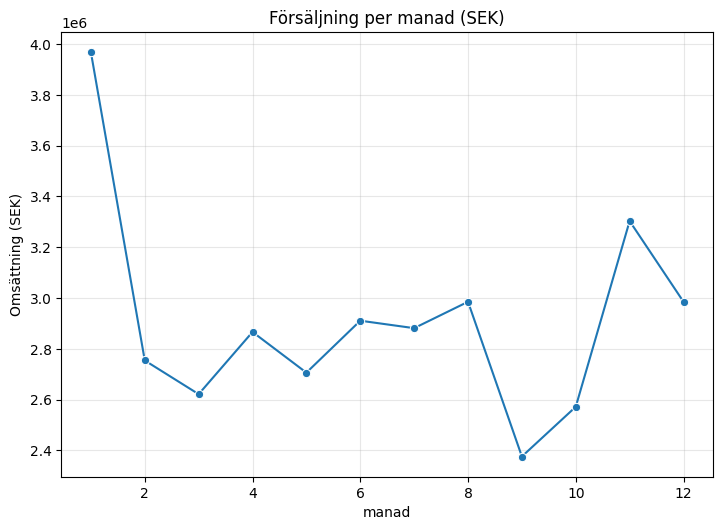

In [ ]:
plt.figure(figsize=(14, 10))

# 1. Försäljning per vecka (linjediagram – bra för trend över tid)
plt.subplot(2, 2, 1)
weekly_revenue = df_confirmed.groupby('manad_bokning')['pris_sek'].sum()
sns.lineplot(x=weekly_revenue.index, y=weekly_revenue.values, marker='o')
plt.title('Försäljning per manad (SEK)')
plt.xlabel('manad')
plt.ylabel('Omsättning (SEK)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\emman\AppData\Local\Temp\ipykernel_15656\2445089123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_dest.values, y=avg_rating_dest.index, palette='viridis')


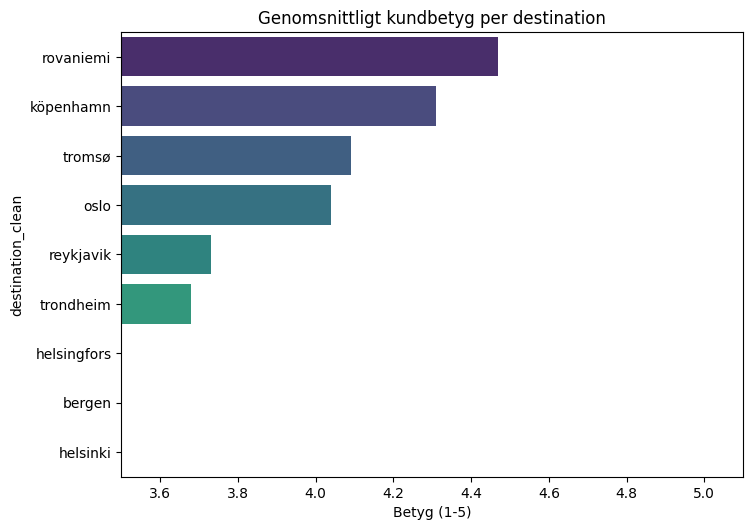

In [ ]:
plt.figure(figsize=(14, 10))

# 2. Genomsnittligt betyg per destination
plt.subplot(2, 2, 2)
sns.barplot(x=avg_rating_dest.values, y=avg_rating_dest.index, palette='viridis')
plt.title('Genomsnittligt kundbetyg per destination')
plt.xlabel('Betyg (1-5)')
plt.xlim(3.5, 5.1)

plt.tight_layout()
plt.show()

C:\Users\emman\AppData\Local\Temp\ipykernel_20800\3688921227.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='mako')


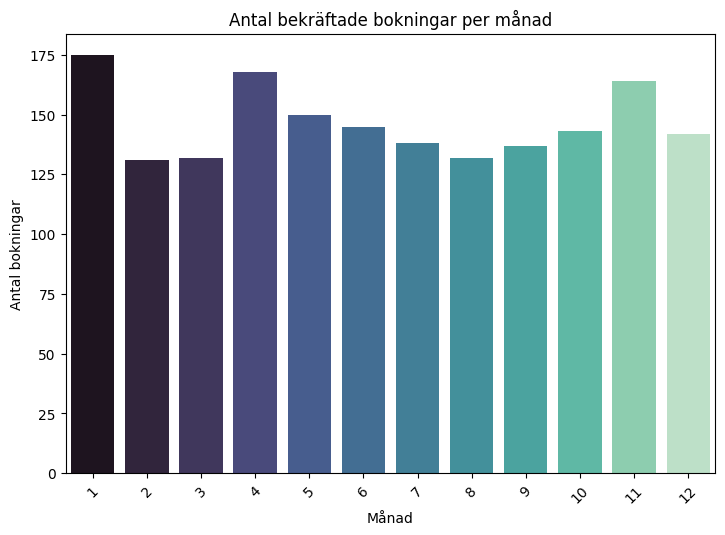

In [ ]:
plt.figure(figsize=(14, 10))

# 3. Bokningar per månad (säsongsmönster)
plt.subplot(2, 2, 3)
monthly_bookings = df_confirmed.groupby('manad_bokning').size()
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='mako')
plt.title('Antal bekräftade bokningar per månad')
plt.xlabel('Månad')
plt.ylabel('Antal bokningar')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

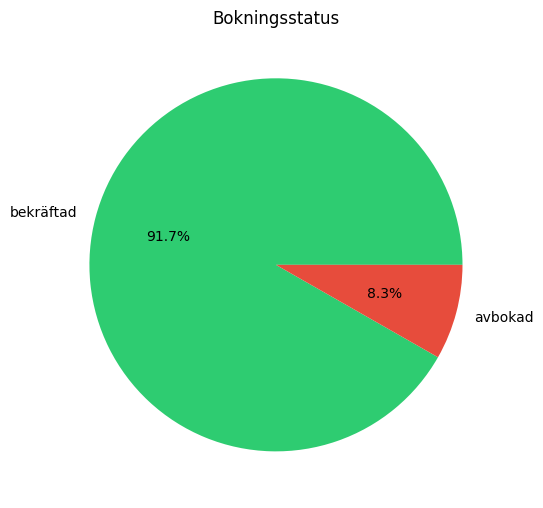

In [ ]:
plt.figure(figsize=(14, 10))

# 4. Andel bekräftade vs avbokade
plt.subplot(2, 2, 4)
status_counts = df_feat['status_clean'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
plt.title('Bokningsstatus')

plt.tight_layout()
plt.show()